Demographics of Americans Acquiring Debt


In [106]:
#Dependencies
import pandas as pd
import csv
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [107]:
#Load in file
loan_file = Path('Resources/loan_data_set.csv')

#Read and display the CSV with Pandas
loan_df = pd.read_csv(loan_file)

print(f"Number of rows in the DataFrame: {len(loan_df)}")
print("This dataset contains a sample of 615 people between ages 18 and 40. Demographics such as income and area of residency were gathered")
loan_df.head()

Number of rows in the DataFrame: 613
This dataset contains a sample of 615 people between ages 18 and 40. Demographics such as income and area of residency were gathered


Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   Applicant_Income  Loan_Amount   Loan_Amount_Term  Credit_History  \
0              5849           NaN             360.0             1.0   
1              4583      $128.00              360.0             1.0   
2              3000       $66.00              360.0             1.0   
3              2583      $120.00              360.0             1.0   
4              6000      $141.00              360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

In [108]:
#Remove columns with missing data
loan_df=loan_df.dropna()
print("This new dataset has removed all samples with missing demographics")
loan_df.head()

This new dataset has removed all samples with missing demographics


Loan_ID Gender Married Dependents     Education Self_Employed  \
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   

   Applicant_Income  Loan_Amount   Loan_Amount_Term  Credit_History  \
1              4583      $128.00              360.0             1.0   
2              3000       $66.00              360.0             1.0   
3              2583      $120.00              360.0             1.0   
4              6000      $141.00              360.0             1.0   
5              5417      $267.00              360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
5         Urban           Y

In [109]:
#Create dataframe with only those that are approved loans 
approved = loan_df[loan_df.iloc[:,11] == "Y"]
approved.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   

   Applicant_Income  Loan_Amount   Loan_Amount_Term  Credit_History  \
2              3000       $66.00              360.0             1.0   
3              2583      $120.00              360.0             1.0   
4              6000      $141.00              360.0             1.0   
5              5417      $267.00              360.0             1.0   
6              2333       $95.00              360.0             1.0   

  Property_Area Loan_Status  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
5         Urban           Y  
6         Urban           Y

In [110]:
#Create dataframe with only those that are rejected loans
rejected = loan_df[loan_df.iloc[:,11] == "N"]
rejected.head()

Loan_ID  Gender Married Dependents Education Self_Employed  \
1   LP001003    Male     Yes          1  Graduate            No   
7   LP001014    Male     Yes         3+  Graduate            No   
9   LP001020    Male     Yes          1  Graduate            No   
13  LP001029    Male      No          0  Graduate            No   
17  LP001036  Female      No          0  Graduate            No   

    Applicant_Income  Loan_Amount   Loan_Amount_Term  Credit_History  \
1               4583      $128.00              360.0             1.0   
7               3036      $158.00              360.0             0.0   
9              12841      $349.00              360.0             1.0   
13              1853      $114.00              360.0             1.0   
17              3510       $76.00              360.0             0.0   

   Property_Area Loan_Status  
1          Rural           N  
7      Semiurban           N  
9      Semiurban           N  
13         Rural           N  
17         Urban           N

In [111]:
#Gather some statistics regarding borrowers incomes
max_income_approved = approved["Applicant_Income"].max()
median_income_approved =approved["Applicant_Income"].median()
min_income_approved = approved["Applicant_Income"].min()
approved_average_income = round(approved["Applicant_Income"].astype("float").mean(), 2)


print(f"The maximum income for those taking loans is {max_income_approved} ")
print(f"The median income for those taking loans is {median_income_approved} ")
print(f"The minimum income for those taking loans is {min_income_approved} ")
print(f"The Americans approved for loans are making an average of {approved_average_income} per month")


married = approved["Married"].value_counts()["Yes"]
count = approved["Married"].count()
per_married = round(married/count *100)

print(f"The percentage of approved applicants that are married is {per_married}%")
print("-------------------------------------------------------------------------------------------------")

#Gather some statistics regarding non-borrowers incomes
max_income_rejected = rejected["Applicant_Income"].max()
median_income_rejected = rejected["Applicant_Income"].median()
min_income_rejected = rejected["Applicant_Income"].min()
rejected_average_income = round(rejected["Applicant_Income"].astype("float").mean(), 2)

print(f"The maximum income for those not taking loans is {max_income_rejected} ")
print(f"The median income for those not taking loans is {median_income_rejected} ")
print(f"The minimum income for those not taking loans is {min_income_rejected} ")
print(f"The Americans rejected for loans are making an average of {rejected_average_income} per month")


married2= rejected["Married"].value_counts()["Yes"]
count2 = rejected["Married"].count()
per_married2 = round(married2/count2 *100)

print(f"The percentage of rejected applicants that are married is {per_married2}%")

The maximum income for those taking loans is 39999 
The median income for those taking loans is 3858.5 
The minimum income for those taking loans is 645 
The Americans approved for loans are making an average of 5201.09 per month
The percentage of approved applicants that are married is 68%
-------------------------------------------------------------------------------------------------
The maximum income for those not taking loans is 33846 
The median income for those not taking loans is 3867.0 
The minimum income for those not taking loans is 150 
The Americans rejected for loans are making an average of 5218.15 per month
The percentage of rejected applicants that are married is 56%


<IPython.core.display.Javascript object>


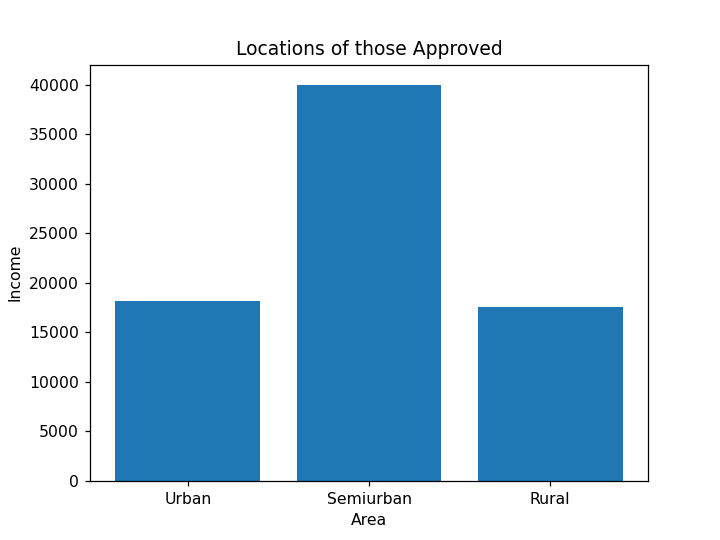

<BarContainer object of 332 artists>

In [118]:
#Create a chart showing what area approved applicants reside
x_axis = approved["Property_Area"]
y_axis = approved["Applicant_Income"]
plt.title("Locations of those Approved")
plt.xlabel("Area")
plt.ylabel("Income")
plt.bar(x_axis,y_axis)

<IPython.core.display.Javascript object>


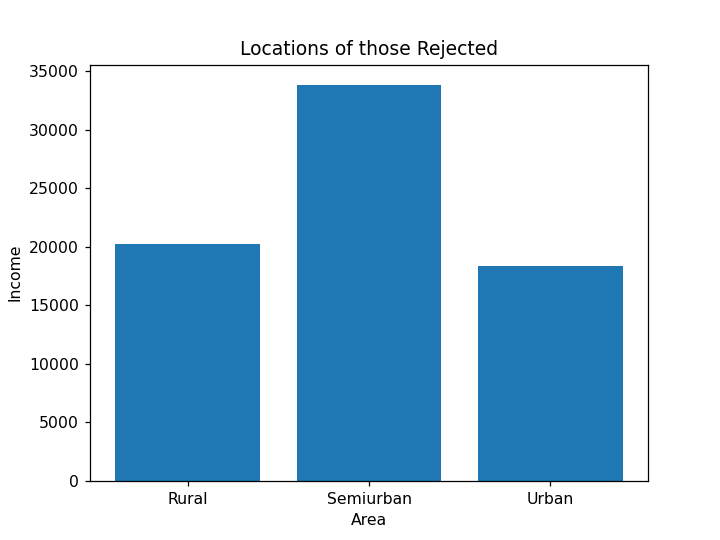

<BarContainer object of 147 artists>

In [119]:
#Create a chart showing what area rejected applicants reside
x_axis2 = rejected["Property_Area"]
y_axis2 = rejected["Applicant_Income"]
plt.title("Locations of those Rejected")
plt.xlabel("Area")
plt.ylabel("Income")
plt.bar(x_axis2,y_axis2)

<IPython.core.display.Javascript object>


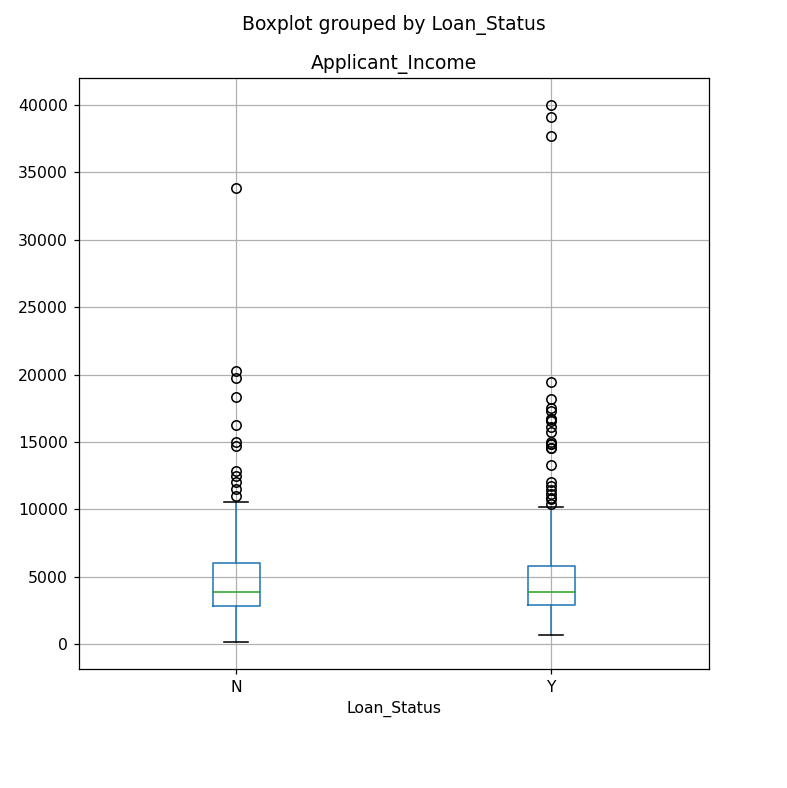

In [116]:
loan_df.boxplot("Applicant_Income", by="Loan_Status", figsize=(7,7))

#Extract individual groups
group0 = loan_df[loan_df["Loan_Status"] == "Y"]["Applicant_Income"]
group1 = loan_df[loan_df["Loan_Status"] == "N"]["Applicant_Income"]

In [161]:
#Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.8917248095740462, pvalue=0.34548738715838234)